In [1]:
import cv2
from darkflow.net.build import TFNet

import matplotlib.pyplot as plt
from sys import exit

import numpy as np
import copy
%config inlineBackend.figure_format = 'svg'

In [2]:
# 학습
options = {
    'model' : 'cfg/lp_detect.cfg',
    'backup' : 'D:/test/1/ckpt/',
    #'load' : 28979,
     #이전 학습 가중치를 이어서 학습(-1은 마지막 save를 불러옴)
    'load' : -1,
    #데이터셋의 전체 크기를 batch만큼 나눔
    'batch': 4,
    #학습의 횟수
    'epoch': 1,
    #gpu 사용 여부
    'gpu' : 0.7,
    'train' : True,
    # learning rate
    'lr' : 0.00001,
    #annotation의 위치
    'annotation': 'c:/project/data/annotations/',
    #dataset의 위치
    'dataset' : 'c:/project/data/dataset/'
    
}

#tensorflow에서 darkflow 사용
tfnet = TFNet(options)

tfnet.train()

Parsing cfg/lp_detect.cfg
Loading None ...
Finished in 0.0s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Init

step 75239 - loss 1.6158496141433716 - moving ave loss 1.281010721597964
step 75240 - loss 1.6341829299926758 - moving ave loss 1.3163279424374352
step 75241 - loss 0.8384541273117065 - moving ave loss 1.2685405609248626
step 75242 - loss 1.2407745122909546 - moving ave loss 1.2657639560614717
step 75243 - loss 1.7392083406448364 - moving ave loss 1.313108394519808
step 75244 - loss 1.9273993968963623 - moving ave loss 1.3745374947574636
step 75245 - loss 1.715036153793335 - moving ave loss 1.4085873606610506
step 75246 - loss 1.8665791749954224 - moving ave loss 1.4543865420944877
step 75247 - loss 1.0185573101043701 - moving ave loss 1.410803618895476
step 75248 - loss 1.397570013999939 - moving ave loss 1.4094802584059223
step 75249 - loss 1.0566341876983643 - moving ave loss 1.3741956513351665
step 75250 - loss 1.2200467586517334 - moving ave loss 1.3587807620668233
step 75251 - loss 1.0220062732696533 - moving ave loss 1.3251033131871064
step 75252 - loss 1.9025144577026367 - movi

step 75351 - loss 1.5887205600738525 - moving ave loss 1.3037607320477995
step 75352 - loss 0.7585582137107849 - moving ave loss 1.2492404802140982
step 75353 - loss 1.2352066040039062 - moving ave loss 1.247837092593079
step 75354 - loss 1.0316338539123535 - moving ave loss 1.2262167687250065
step 75355 - loss 0.9248177409172058 - moving ave loss 1.1960768659442265
step 75356 - loss 0.9049404859542847 - moving ave loss 1.1669632279452322
step 75357 - loss 0.698576807975769 - moving ave loss 1.1201245859482858
step 75358 - loss 1.0480808019638062 - moving ave loss 1.112920207549838
step 75359 - loss 1.223260760307312 - moving ave loss 1.1239542628255854
step 75360 - loss 1.2631593942642212 - moving ave loss 1.137874775969449
step 75361 - loss 1.0302435159683228 - moving ave loss 1.1271116499693363
step 75362 - loss 1.035943627357483 - moving ave loss 1.117994847708151
step 75363 - loss 1.2072135210037231 - moving ave loss 1.1269167150377082
step 75364 - loss 0.6102250814437866 - moving

step 75463 - loss 1.2103636264801025 - moving ave loss 1.0617788580173764
step 75464 - loss 1.2038031816482544 - moving ave loss 1.0759812903804642
step 75465 - loss 1.318285346031189 - moving ave loss 1.1002116959455366
step 75466 - loss 1.0680667161941528 - moving ave loss 1.0969971979703983
step 75467 - loss 1.553605556488037 - moving ave loss 1.1426580338221621
step 75468 - loss 1.6885294914245605 - moving ave loss 1.197245179582402
step 75469 - loss 0.6228592395782471 - moving ave loss 1.1398065855819863
step 75470 - loss 1.1197030544281006 - moving ave loss 1.1377962324665978
step 75471 - loss 1.408909797668457 - moving ave loss 1.1649075889867837
step 75472 - loss 0.9060372710227966 - moving ave loss 1.139020557190385
step 75473 - loss 1.9537672996520996 - moving ave loss 1.2204952314365567
step 75474 - loss 0.6552442312240601 - moving ave loss 1.163970131415307
step 75475 - loss 1.034336805343628 - moving ave loss 1.1510067988081392
step 75476 - loss 2.545116424560547 - moving 

step 75575 - loss 0.7561368942260742 - moving ave loss 1.0564834091264075
step 75576 - loss 0.6085795164108276 - moving ave loss 1.0116930198548495
step 75577 - loss 1.2582569122314453 - moving ave loss 1.0363494090925092
step 75578 - loss 0.8865525722503662 - moving ave loss 1.021369725408295
step 75579 - loss 1.1977883577346802 - moving ave loss 1.0390115886409335
step 75580 - loss 1.7607473134994507 - moving ave loss 1.1111851611267851
step 75581 - loss 0.6040812730789185 - moving ave loss 1.0604747723219985
step 75582 - loss 0.570298969745636 - moving ave loss 1.0114571920643622
step 75583 - loss 0.5349237322807312 - moving ave loss 0.9638038460859991
step 75584 - loss 1.4333575963974 - moving ave loss 1.0107592211171392
step 75585 - loss 1.4988389015197754 - moving ave loss 1.0595671891574028
step 75586 - loss 0.8373181819915771 - moving ave loss 1.0373422884408203
step 75587 - loss 1.6177442073822021 - moving ave loss 1.0953824803349586
step 75588 - loss 1.0540480613708496 - movi

step 75687 - loss 1.4624193906784058 - moving ave loss 1.3145203509145877
step 75688 - loss 1.5258312225341797 - moving ave loss 1.335651438076547
step 75689 - loss 0.6047706007957458 - moving ave loss 1.262563354348467
step 75690 - loss 1.2253248691558838 - moving ave loss 1.2588395058292086
step 75691 - loss 1.0247985124588013 - moving ave loss 1.235435406492168
step 75692 - loss 0.8191816806793213 - moving ave loss 1.1938100339108835
step 75693 - loss 0.9392565488815308 - moving ave loss 1.1683546854079483
step 75694 - loss 0.8483677506446838 - moving ave loss 1.1363559919316217
step 75695 - loss 1.2530949115753174 - moving ave loss 1.1480298838959913
step 75696 - loss 1.2061687707901 - moving ave loss 1.153843772585402
step 75697 - loss 0.8162740468978882 - moving ave loss 1.1200868000166508
step 75698 - loss 0.6628481149673462 - moving ave loss 1.0743629315117205
step 75699 - loss 1.100616693496704 - moving ave loss 1.076988307710219
step 75700 - loss 1.5599861145019531 - moving a

In [11]:
# 실행
options = {
    "model" : 'cfg/lp_detect.cfg',
   # 'load' : 'bin/yolo.weights',
    'backup' : 'D:/test/1/ckpt/',
    'load' : -1,#43441,
    #confidence가 threshold보다 높을 경우 바운딩박스를 수용하겠다는 의미
    'threshold' : 0.1,
    'gpu' : 0.8
}

tfnet = TFNet(options)
#tfnet.load_from_ckpt()

Parsing cfg/lp_detect.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Init  |  

[{'label': 'license', 'confidence': 0.14552782, 'topleft': {'x': 2678, 'y': 1572}, 'bottomright': {'x': 2968, 'y': 1721}}, {'label': 'license', 'confidence': 0.65738183, 'topleft': {'x': 3576, 'y': 1585}, 'bottomright': {'x': 3790, 'y': 1693}}, {'label': 'license', 'confidence': 0.8453109, 'topleft': {'x': 781, 'y': 2111}, 'bottomright': {'x': 1309, 'y': 2381}}]


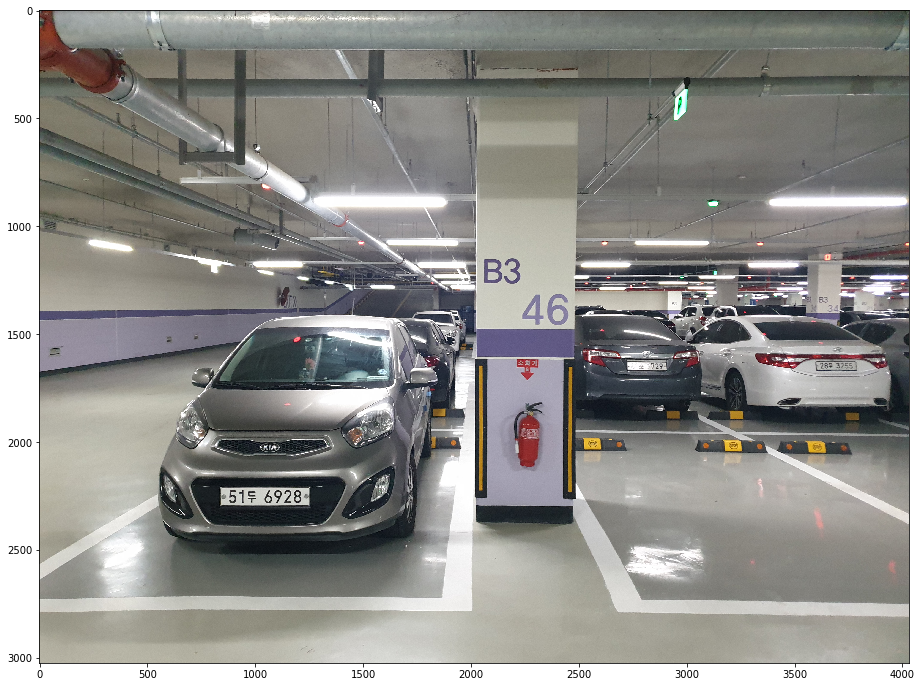

0.14552782 (2678, 1572) (2968, 1721)


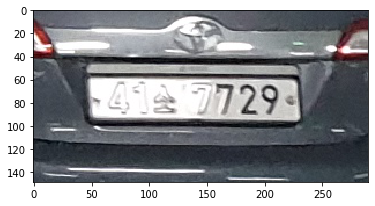

0.65738183 (3576, 1585) (3790, 1693)


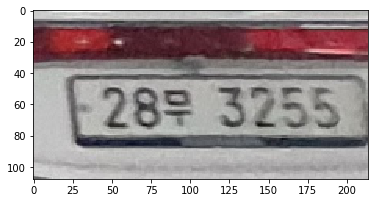

0.8453109 (781, 2111) (1309, 2381)


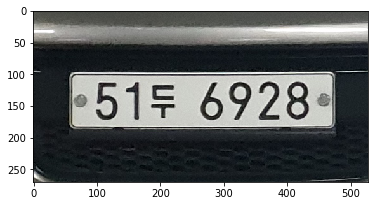

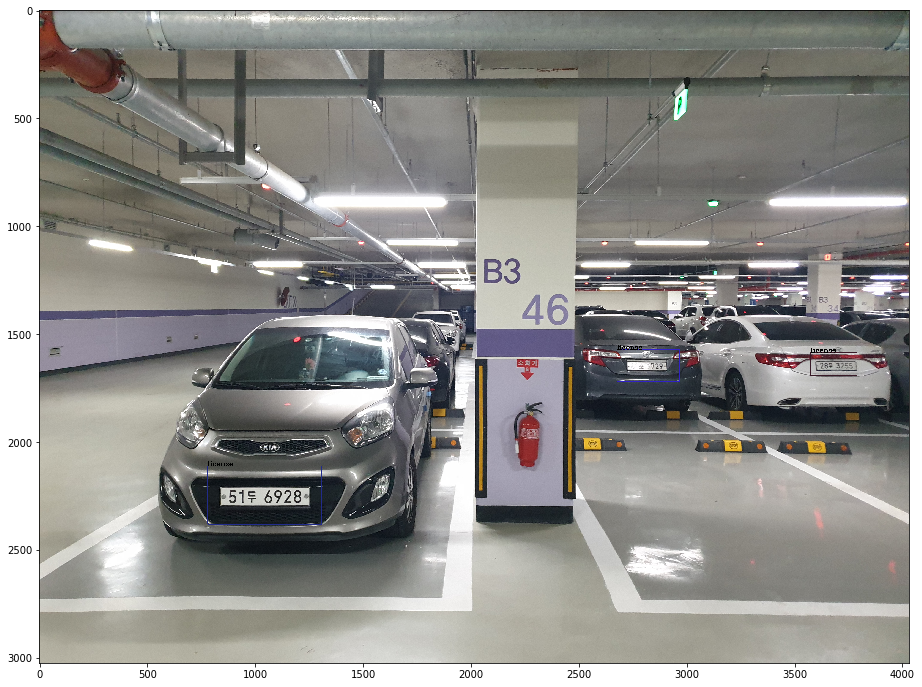

In [14]:
#이미지 파일을 color로 읽음
img = cv2.imread('C:/project/data/dataset/image_739.jpg', cv2.IMREAD_COLOR)
img1= img

#BGR 사진을 RGB 사진으로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#json형태로 결과 출력
results = tfnet.return_predict(img)
print((results))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#plot으로 원본 이미지 출력
fig = plt.figure(figsize=(19, 12)) 
plt.imshow(img1)
plt.show()

#이미지 3차원 행렬(y축, x축, 바로 색을 표현하는 BGR)
img.shape

#랜덤한 색으로 추출된 바운딩 박스와 라벨 표시
resultimg = copy.deepcopy(img)
colors = [tuple(255*np.random.rand(3)) for _ in range(1000)]
for color, result in zip(colors, results):
    t1 = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    
    print(confidence,t1,br)
    crop_img = img[t1[1]:br[1], t1[0]:br[0]]
    plt.imshow(crop_img)
    plt.show()

    resultimg = cv2.rectangle(resultimg, t1, br, color, 2)
    resultimg = cv2.putText(resultimg, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)

#plot으로 결과가 표시된 이미지 출력
fig = plt.figure(figsize=(19, 12)) 
plt.imshow(resultimg)
plt.show()


{'label': 'license', 'confidence': 0.034519, 'topleft': {'x': 2, 'y': 559}, 'bottomright': {'x': 6, 'y': 586}}
(2, 559) (6, 586)


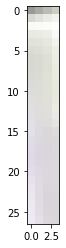

In [5]:
index = 0

print((results[index]))
t1 = (results[index]['topleft']['x'], results[index]['topleft']['y'])
br = (results[index]['bottomright']['x'], results[index]['bottomright']['y'])
print(t1,br)
crop_img = img[t1[1]:br[1], t1[0]:br[0]]
plt.imshow(crop_img)
plt.show()

In [6]:
cv2.imwrite("c:/project/data/result/result.jpg",crop_img)

True